   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

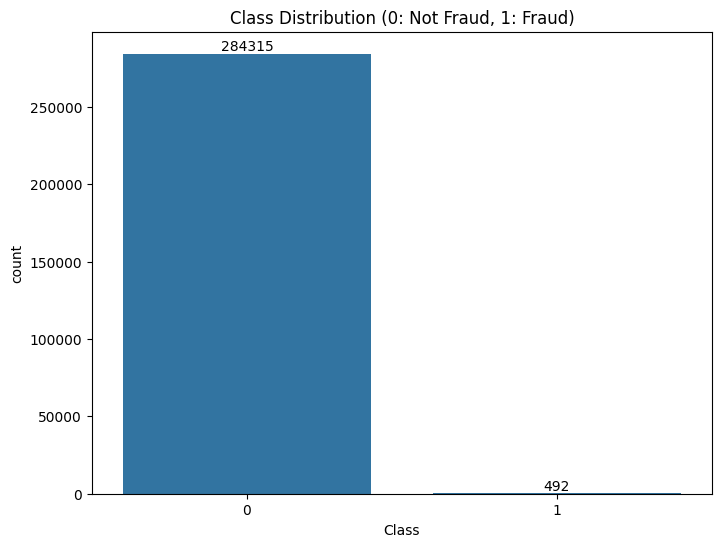


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.07      0.01      0.02        98

    accuracy                           1.00     56962
   macro avg       0.53      0.50      0.51     56962
weighted avg       1.00      1.00      1.00     56962



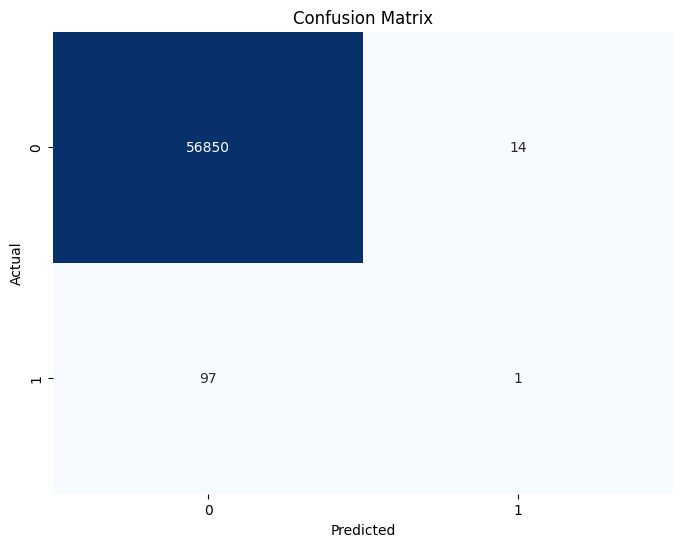

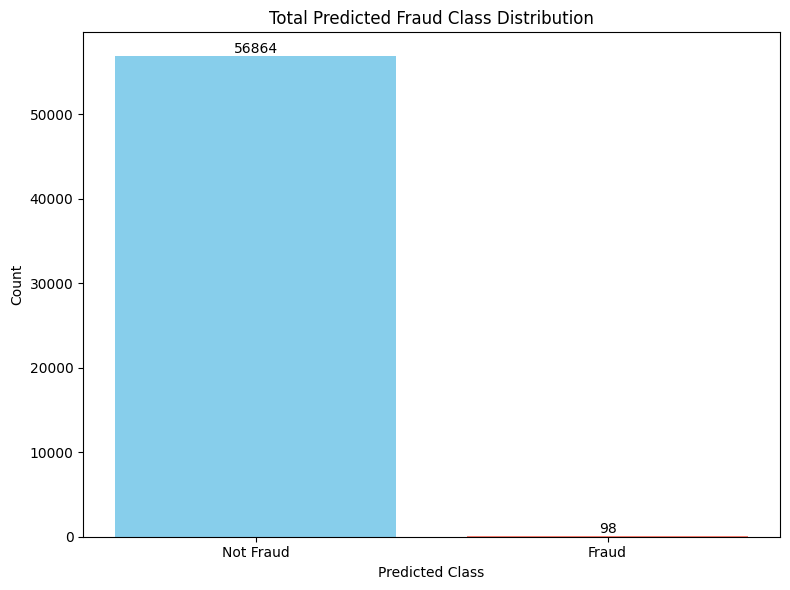

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

# Exploring the dataset
print(data.head())
print(data.info())

# Visualizing the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
class_counts = data['Class'].value_counts()
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

# Feature selection and engineering (for simplicity, we use all features)
features = data.columns[:-1]
X = data['Amount']
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the feature array to ensure it has two dimensions
X_train = X_train.values.reshape(-1, 1)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
X_test_reshaped = X_test.values.reshape(-1, 1)
predictions = model.predict(X_test_reshaped)

# Evaluate the model
print('\nClassification Report:')
print(classification_report(y_test, predictions))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Plot the bar graph for total fraud predictions
plt.figure(figsize=(8, 6))
total_fraud_predictions = cm[1, :].sum()  # Sum of all predictions for class 1 (Fraud)
total_not_fraud_predictions = cm[0, :].sum()  # Sum of all predictions for class 0 (Not Fraud)
plt.bar(['Not Fraud', 'Fraud'], [total_not_fraud_predictions, total_fraud_predictions], color=['skyblue', 'salmon'])
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Total Predicted Fraud Class Distribution')

# Annotate the bars with their counts
for i, count in enumerate([total_not_fraud_predictions, total_fraud_predictions]):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

